## Figure3-7 The full lifecycle cost  (Int$2020) of the sewage system for the entire sanitation value chain against the improvement of the sewer connectivity. The bar chart illustrates the proportion of the costs of each stage at the sanitation value chain, and the line chart shows the total cost in acordance with the sewer connectivity changes. The diagram starts with the present value on June 2022 and ends with when the connectivity reaches the design capacity of the system (3,500m3 per day). The data table below the chart summarise the Total annualised costs per household (TACH) values for each stage and sewer connectivity.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [118]:
# variables
path_excel = r'data.xlsx'
sheet_name = 'lifecycle_cost_sewer'
file_path = r'fig3-7_sewer_fulllifecycle_cost.png'
dpi = 700

plt.rcParams['font.size'] = 14

In [119]:
# create value labels automatically on the chart graph
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            ax.annotate(
                f"{height:.0f}", 
                xy=(rect.get_x() + rect.get_width() / 2, rect.get_y()),
                xytext=(35, 0), 
                textcoords="offset points", 
                ha='center', 
                va='bottom', 
                fontsize=16, 
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))

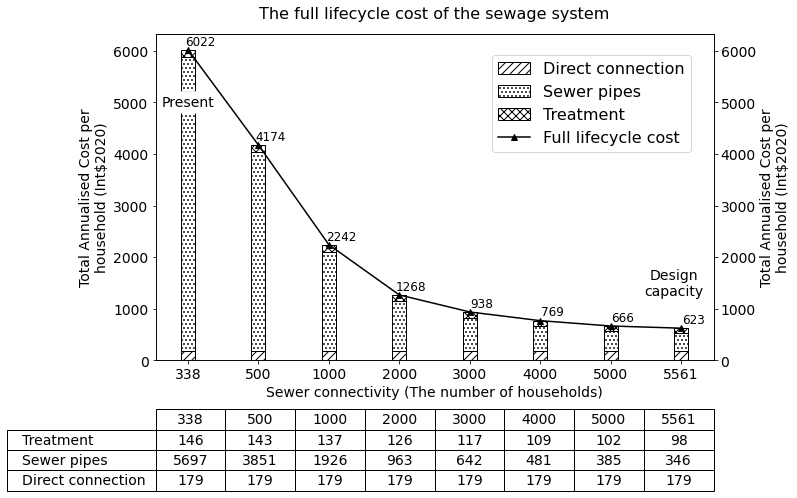

In [126]:
df = pd.read_excel(
    path_excel, 
    sheet_name=sheet_name,
    nrows = 8,
    usecols=['Sewer connectivity','Direct connection','Sewer pipes','Treatment']
)

df['Sewer connectivity'] = df['Sewer connectivity'].astype(str)

# print(df)

fig, ax1 = plt.subplots(figsize=[10,6])

bottom = None
hatches = ['///', '...', 'xxx'] 
for i, column in enumerate(df.columns[1:]):
    bar = ax1.bar(
        df.iloc[:, 0], 
        df[column], 
        width = 0.2,
        color='w', 
        edgecolor='k', 
        bottom=bottom, 
        label=column, 
        hatch=hatches[i % len(hatches)]
    )
    bottom = df[column] if bottom is None else bottom + df[column]
        
ax1.set_xticks(df.iloc[:, 0]) 
ax1.set_title('The full lifecycle cost of the sewage system', loc='center', x=0.5, y=1.03, fontsize=16)
ax1.set_xlabel('Sewer connectivity (The number of households)', fontsize=14)
ax1.set_ylabel('Total Annualised Cost per\nhousehold (Int$2020)', fontsize=14)

handles, labels = ax1.get_legend_handles_labels()
reverse_order = list(range(len(labels)-1, -1, -1))

table_data = df.set_index('Sewer connectivity').T
table_data = table_data.round(decimals=0).astype(int)
table_data = table_data.iloc[::-1]
table = ax1.table(
    cellText=table_data.values, 
    cellLoc='center', 
    colLabels=table_data.columns, 
    rowLabels=table_data.index, 
    loc='bottom',
    bbox = [0, -0.4, 1, 0.25]
)

table.auto_set_font_size(False)
table.set_fontsize(14)

ax2 = ax1.twinx()
sum = df.sum(axis=1, numeric_only=True)
line = ax2.plot(df.index, sum, color='k', marker='^', label='Full lifecycle cost')

ax2.set_ylabel('Total Annualised Cost per\nhousehold (Int$2020)', fontsize=14)

for x, y in zip(df.index, sum):
    ax2.annotate("{:.0f}".format(y), xy=(x, y), xytext=(12, 5), textcoords="offset points", ha='center', fontsize=12)

# y軸の範囲を揃える
ax.set_ylim([0, sum.max()])
ax2.set_ylim([0, sum.max() * 1.05])

# ax1とax2の共通凡例を作成する
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
handles = lines + lines2
labels = labels + labels2
fig.legend(handles, labels, bbox_to_anchor=(0.88, 0.85), fontsize=16)

ax1.text(0, 5000, 'Present', fontsize=14, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', alpha=1, boxstyle='round'))

ax1.text(6.9, 1500, 'Design\ncapacity', fontsize=14, ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', alpha=1, boxstyle='round'))

plt.savefig(file_path, format="png", dpi=dpi, transparent=True, bbox_inches='tight')
plt.show()